In [1]:
#import libs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [2]:
fashion_dataset=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_dataset.load_data()

In [3]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
len(test_labels)

10000

# Expolre dataset

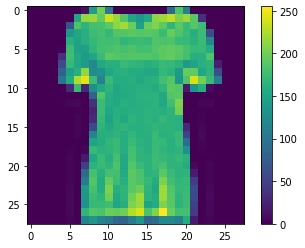

In [8]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

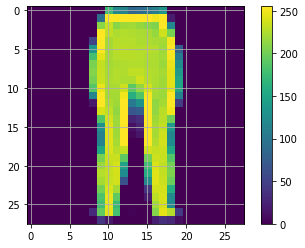

In [9]:
plt.figure()
plt.imshow(train_images[80])
plt.colorbar()
plt.grid(True)
plt.show()

# data Preprocessing

In [10]:
train_images=train_images/255.0
test_images=test_images/255.0

# Dataset visualisation with class names

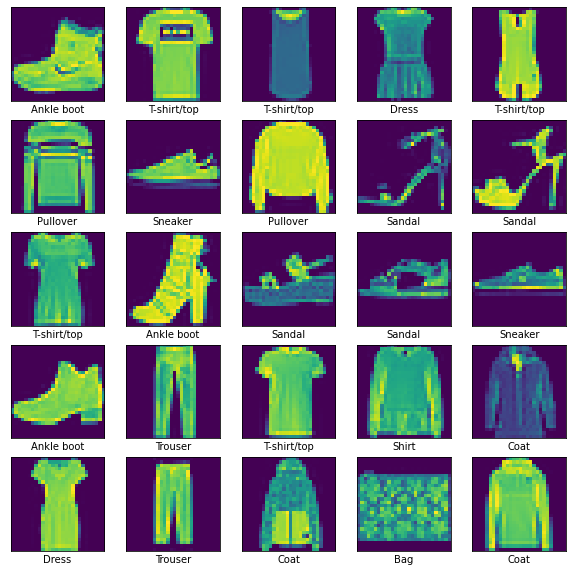

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

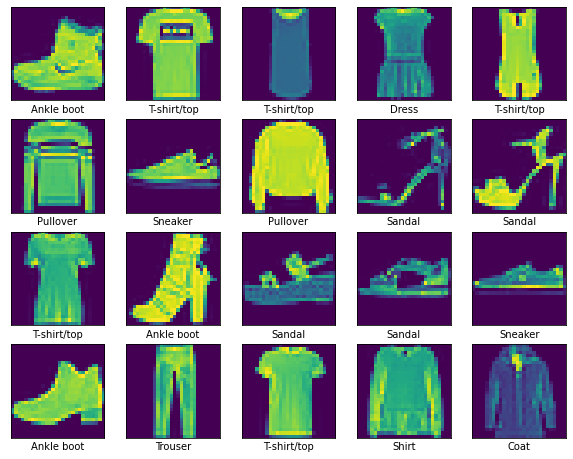

In [12]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building the model

In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             
             )

# training the model

In [15]:
model.fit(train_images, train_labels, epochs=10)

2022-04-06 08:22:06.237285: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5010 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3391 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3163 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2822 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9011: 0s - loss: 0.270
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2601 - accuracy: 0.9014
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2499 - accuracy: 0.9057
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/

# evaluating the model

In [16]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print('\n Test Accuracy', test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.3512 - accuracy: 0.8766

 Test Accuracy 0.8766000270843506


# Predictions

In [17]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [18]:
predictions=probability_model.predict(test_images)

In [19]:
predictions[0]

array([4.5913714e-07, 1.0026922e-07, 5.5248199e-07, 7.7053079e-07,
       7.0183113e-09, 3.8203804e-03, 1.4189407e-06, 4.1103613e-02,
       3.1836515e-07, 9.5507240e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array,true_label,img):
    true_label,img=true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    
    plt.xlabel("{}{}%({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]), color=color)
def plot_value_array(i,predictions_array,true_label):
    true_label=true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

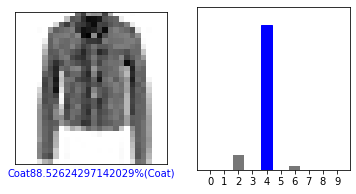

In [28]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()